<a href="https://colab.research.google.com/github/SatyamOzaR/olivetti-data-face-completion/blob/main/face_completion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#face completion
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
data=datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [4]:
targets=data.target
data=data.images.reshape(len(data.images),-1)
train=data[targets<30]
test=data[targets>=30]

In [9]:
n_pixels = data.shape[1]
X_train = train[:, :(n_pixels + 1) // 2]
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]
n_faces = 5

In [7]:
from sklearn.linear_model import LinearRegression
ESTIMATORS = {
    "Linear regression": LinearRegression(),
}
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

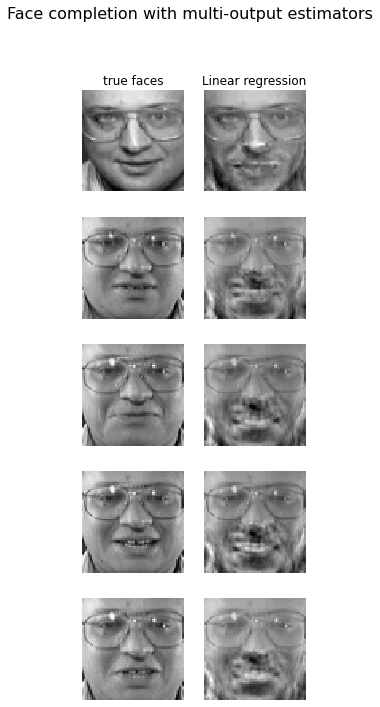

In [10]:
# Plot the completed faces
image_shape = (64, 64)
n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))
    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))
        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)
        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
plt.show()